In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
data=pd.read_csv(r'C:\Users\admin\Desktop\my projects\Data science salaries\ds_salaries.csv')
#visualize the first five rowsin the dataset
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
#Interrogate the dataset for its inner secrets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
# viewing the column names in the dataset
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [5]:
#print the shape of the dataset
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 3755 rows and 11 columns


In [6]:
#checking the null values in the dataset
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

The dataset has no missing values

In [7]:
#display the summary statistics of the dataset
data.describe().style.background_gradient(cmap='viridis')

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.373635,190695.571771,137570.389880,46.271638
std,0.691448,671676.500508,63055.625278,48.589050
min,2020.000000,6000.000000,5132.000000,0.000000
25%,2022.000000,100000.000000,95000.000000,0.000000
50%,2022.000000,138000.000000,135000.000000,0.000000
75%,2023.000000,180000.000000,175000.000000,100.000000
max,2023.000000,30400000.000000,450000.000000,100.000000


The average salary in usd was 137570.
minimum salary is 5132 dollars
maximum salary is 450000 dollars

#### Visualizations

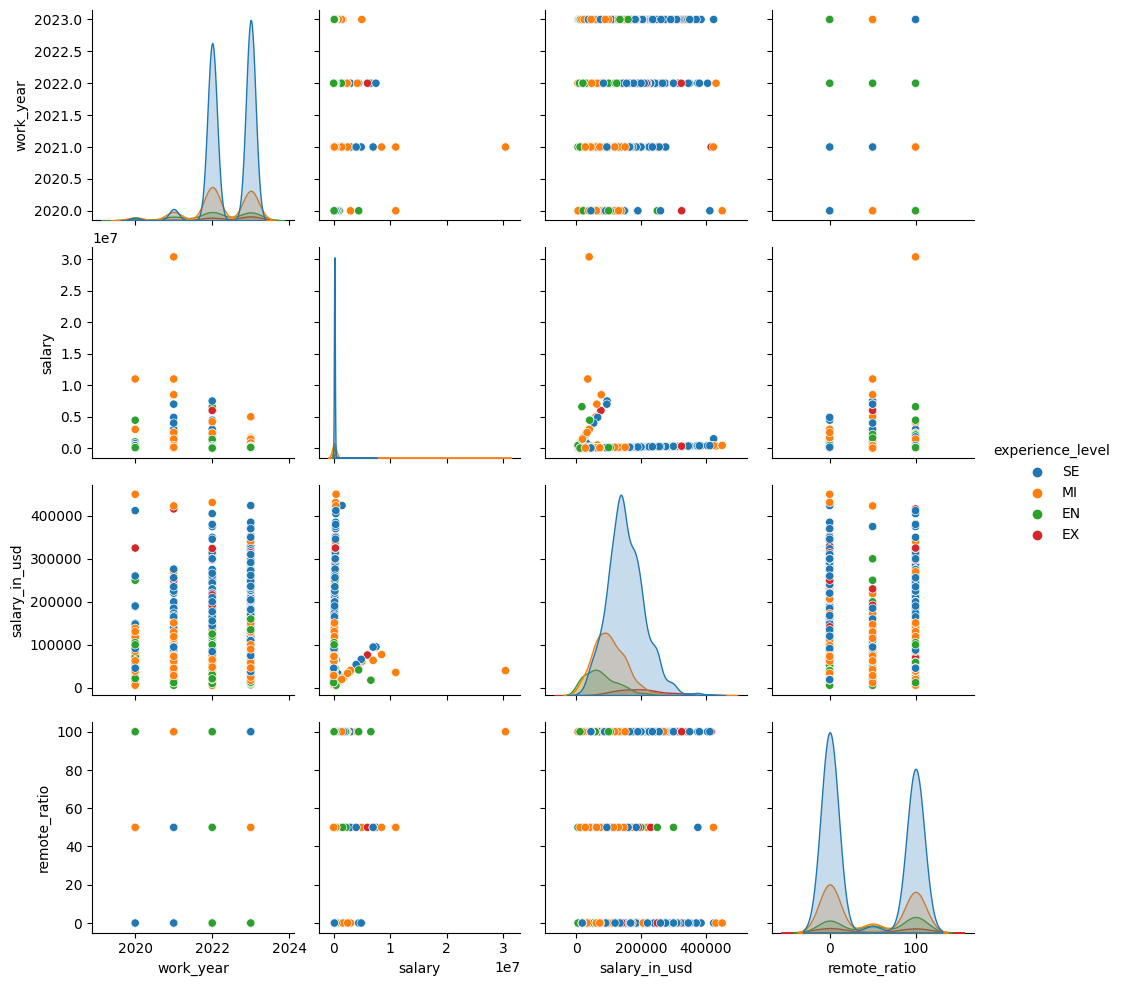

In [8]:
#create a pairplot using Seaborn (sns) to visualize relationships between variables in the dataset.
#coloring the points based on the 'experience_level' column
sns.pairplot(data,kind='scatter',hue='experience_level');

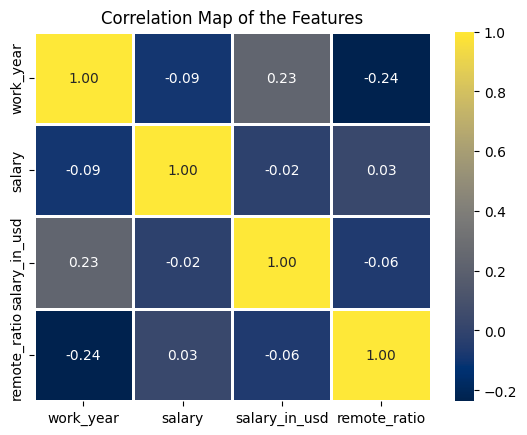

In [9]:
#visualize the correlation map
# Set the background color of the plot
plt.rcParams["axes.facecolor"] = '#FFFFFF'
# Assuming 'data' is your DataFrame, exclude non-numeric columns
numeric_data = data.select_dtypes(include='number')
# Calculate the correlation matrix for the numeric data
corr = numeric_data.corr()
# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='cividis', fmt='.2f', linewidths=1)
# Set the title of the heatmap
plt.title("Correlation Map of the Features")
#display the heatmap
plt.show()

Obresvations:
* The correlation map shows some columns have negative correlation
* Work year has negative correlation with salary and remote ratio
* salary column shows negative correlation with year and  salary in usd
* salary shows negative correlation with remote ratio and salary
* remote ratiohas negative correlation with work year and salary in usd

## Exploratory Data Analysis

### Questions asked in the data
* Identify which year most data scientist salaries posted using a bar chart
* identify the levels of people in the dataset based on experience using a pie chart
* Understand the relationship between salary in usd and experience usin g histogram
* Find the type of companies that pay more salary to data scientists
* Find the experience level that get the most salary
* Find the average salary for data scientist using bar chart
* Find the salaries paid in remote based roles
* visualize the employment status that is full time
* Avereage salary locationwise
* top ten jobs in US
* top highpaying jobs in medium and small companies


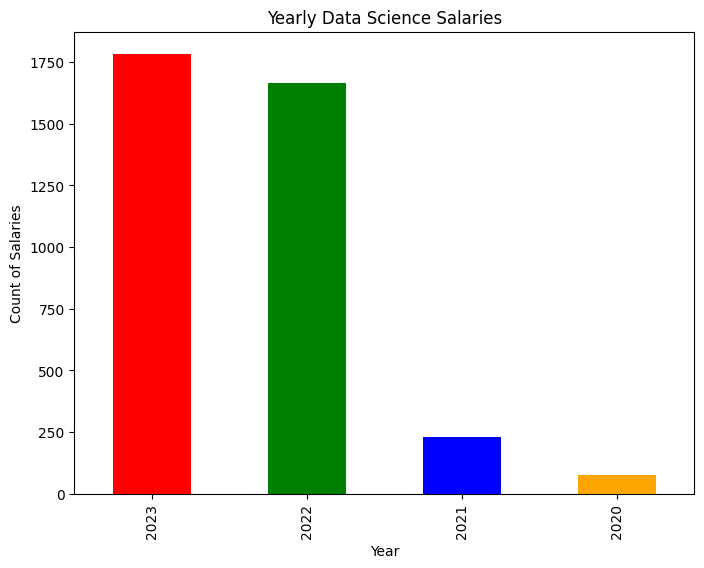

In [10]:
# Calculate the count of data scientist salaries for each year, sorted in descending order
yearly_counts = data['work_year'].value_counts().sort_values(ascending=False)
# Specify the colors
bar_colors = ['red', 'green', 'blue', 'orange'] 
# Create a bar chart to visualize the counts of salaries for each year
yearly_counts.plot(kind='bar', figsize=(8, 6), title="Yearly Data Science Salaries", color=bar_colors)
# Set the label for the x-axis
plt.xlabel("Year")
# Set the label for the y-axis
plt.ylabel("Count of Salaries")
# Display the bar chart
plt.show()


#### Observations
* in the year 2023 most of the data scientist salary is hiher compared to other years
* In 2020, the data scientists got the least salary

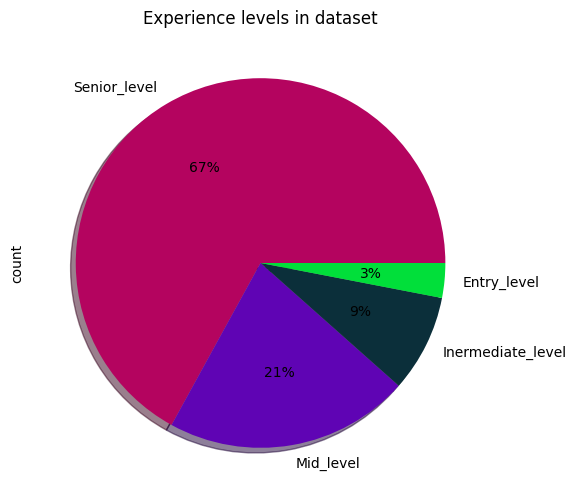

In [11]:
#identify the levels of people in the dataset based on experience
data['experience_level'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(8,6),title="Experience levels in dataset"\
      ,autopct='%1.0f%%',
      labels=['Senior_level', 'Mid_level','Inermediate_level', 'Entry_level'],
      colors=['#B4045F', '#5F04B4', '#0B2F3A', '#01DF3A'],
      shadow=True)
plt.show()



#### Observations
* in the piechart we can see most of companies hired senior data scientists that is 67%.
* Only 3% of data scientists were recruited at entry level.

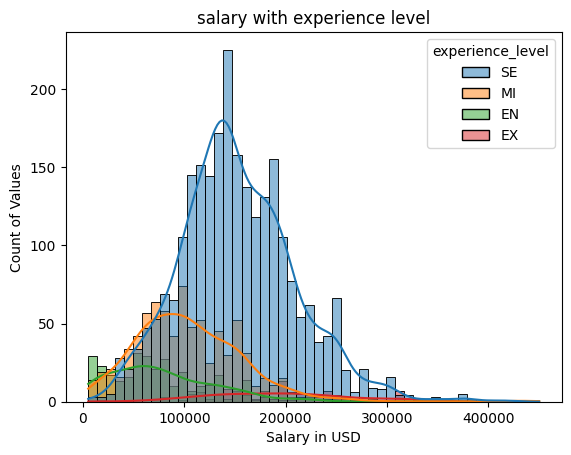

In [12]:
#understanding salary vs experience
sns.histplot(data=data, x='salary_in_usd', hue='experience_level', bins=50,stat='count',kde=True)
plt.title('salary with experience level')
plt.xlabel('Salary in USD')
plt.ylabel('Count of Values')
plt.show()

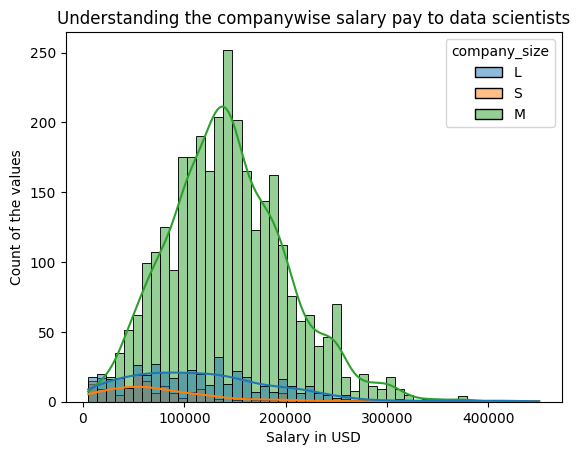

In [13]:
#Understanding the company wise salary pay to the data scientist
sns.histplot(data=data, x='salary_in_usd', hue='company_size',bins=50,stat='count',kde=True)
plt.title('Understanding the companywise salary pay to data scientists')
plt.xlabel('Salary in USD')
plt.ylabel('Count of the values')
plt.show()

#### Observations
* The first chart shows most of the senior employees recieved 100,000 to 300,000
* Middle level experienced data scientists get nearly 100000 to 200000
* Intermediate and entry level get to 1000 to 100000
* large companies pay well with salary in range of 5000 t0 400000
* Medium companies pay data scientists 10000 to 350000

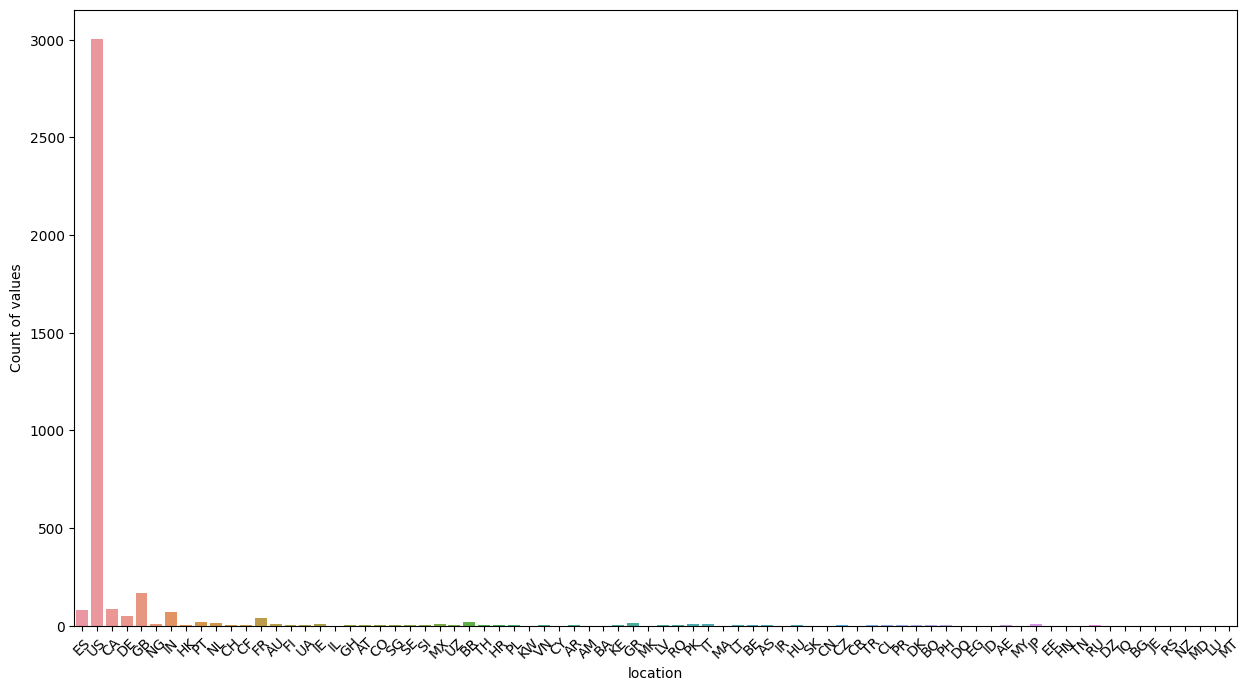

In [23]:
#visualize the employee residence in the data using count plot
plt.figure(figsize=(15,8))
sns.countplot(data=data,x='employee_residence')
plt.xticks(rotation=45)
plt.xlabel('location')
plt.ylabel('Count of values')
plt.show()

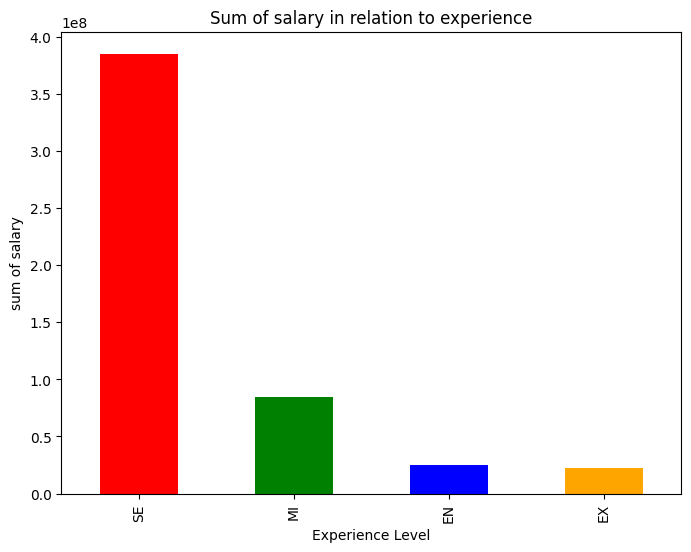

In [15]:
#sum of salary in USD with experience wise and sort the values
data.groupby(['experience_level'])['salary_in_usd'].sum().sort_values(ascending=False)\
.plot(kind='bar',title='Sum of salary in relation to experience', figsize=(8,6), color=bar_colors)
plt.xlabel('Experience Level')
plt.ylabel('sum of salary')
plt.show()

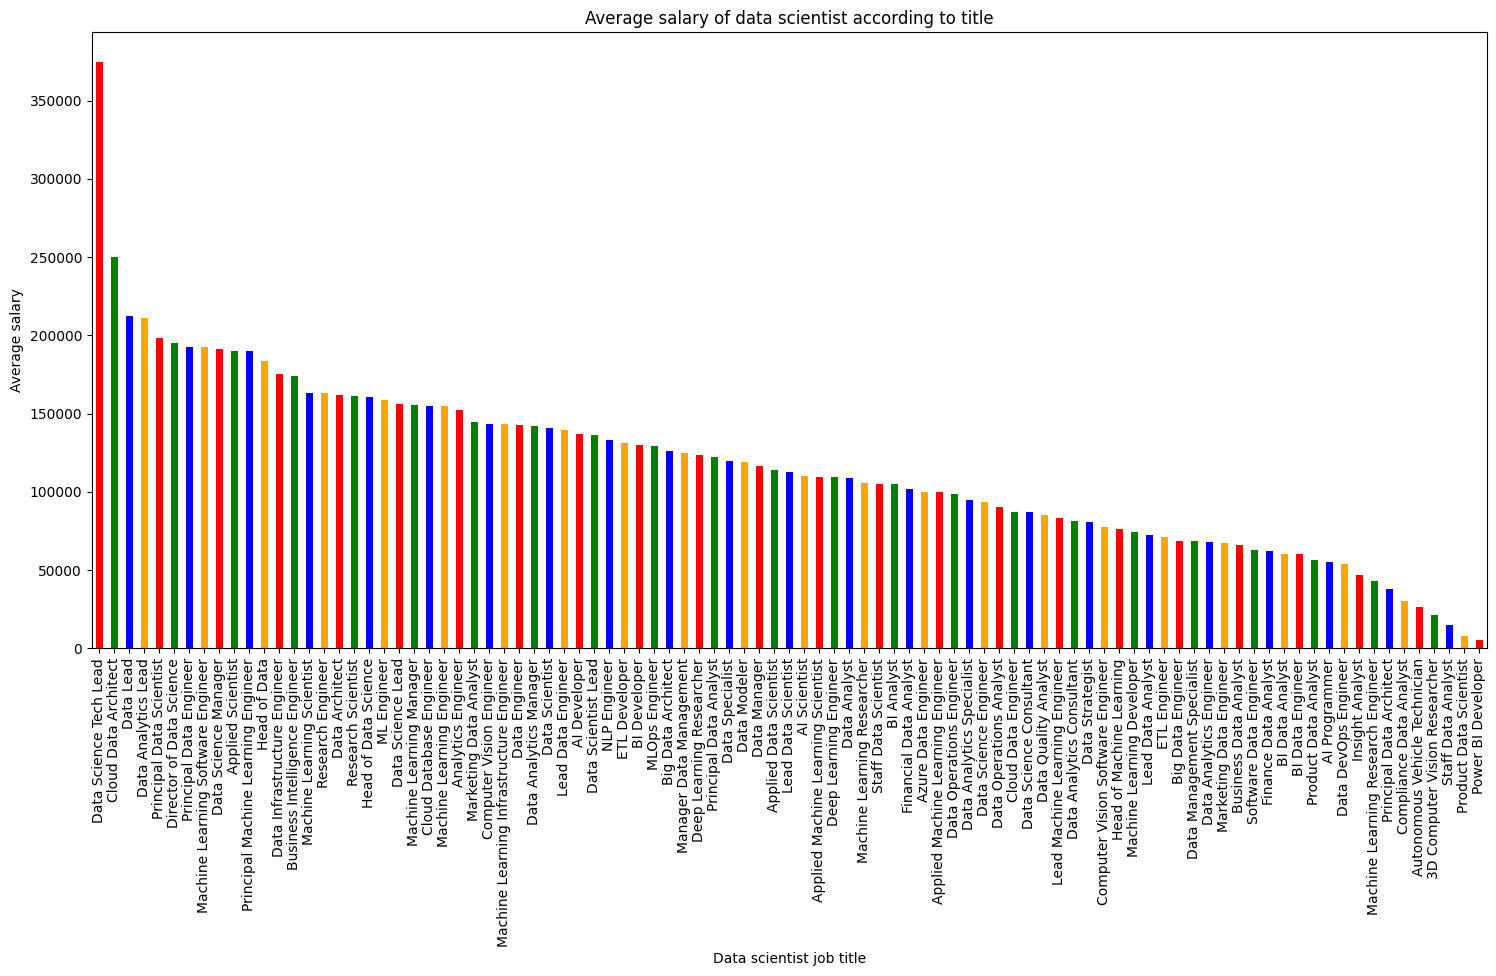

In [16]:
# Visualize the salary according to the role
data.groupby(['job_title'])['salary_in_usd'].mean().sort_values(ascending=False)\
.plot(kind='bar',figsize=(18,8),title='Average salary of data scientist according to title', color=bar_colors)
plt.xlabel('Data scientist job title')
plt.ylabel('Average salary')
plt.xticks(rotation=90)
plt.show()

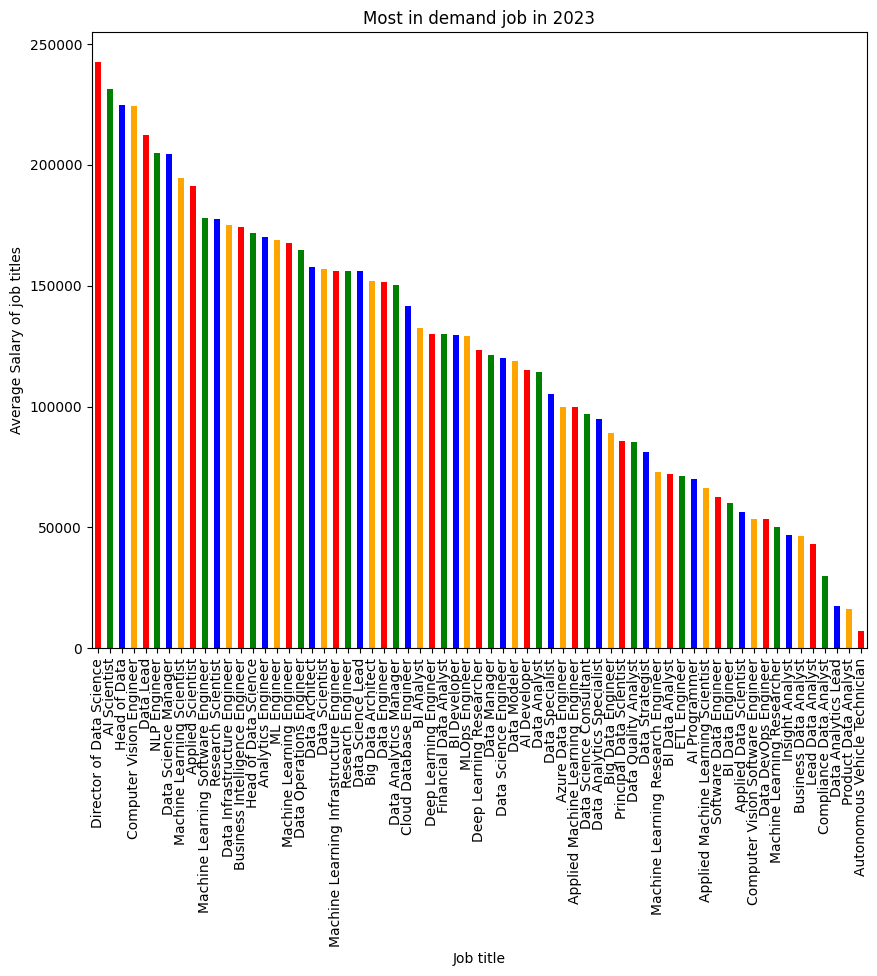

In [17]:
#visualize the job title with salary
data_2023=data['work_year']==2023
data.loc[data_2023].groupby(['job_title'])['salary_in_usd'].mean().sort_values(ascending=False)\
.plot(kind='bar', figsize=(10,8),title='Most in demand job in 2023', color=bar_colors)
plt.xlabel('Job title')
plt.ylabel('Average Salary of job titles')
plt.show()

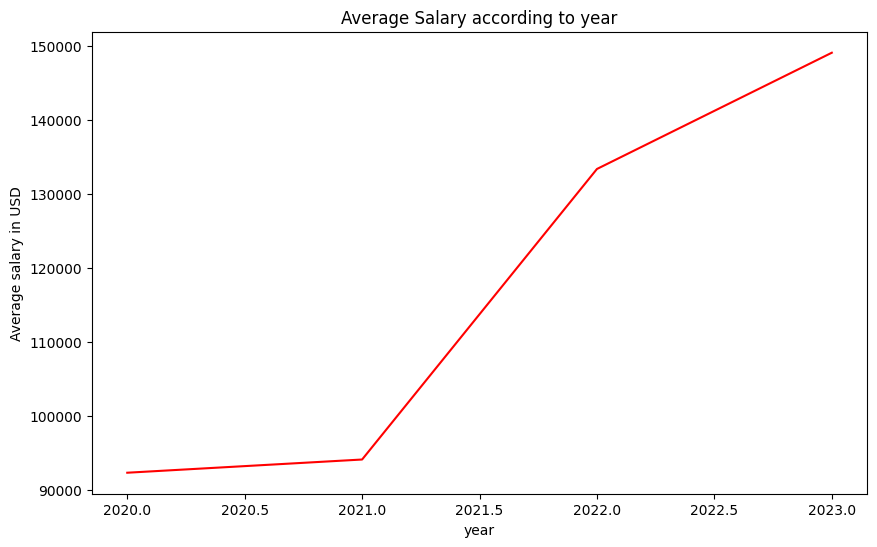

In [18]:
#Understanding the average salary in usd with year wise using the line chart
data.groupby(['work_year'])['salary_in_usd'].mean().sort_values(ascending=False)\
.plot(kind='line',figsize=(10,6),title='Average Salary according to year', color=bar_colors)
plt.xlabel('year')
plt.ylabel('Average salary in USD')
plt.show()

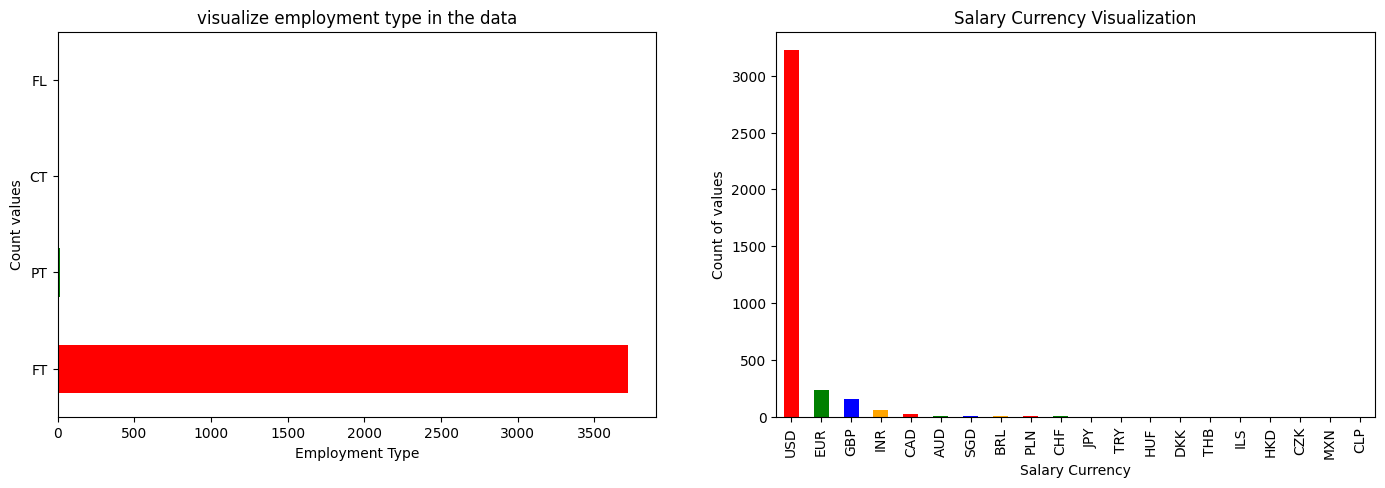

In [19]:
#checking the employment status and salary currency
plt.subplots(1,2,figsize=(17,5))
plt.subplot(121)
data['employment_type'].value_counts().sort_values(ascending=False)\
.plot(kind='barh', title='Employent Type', color=bar_colors)
plt.xlabel('Employment Type')
plt.ylabel('Count values')
plt.title('visualize employment type in the data')
plt.subplot(122)
data['salary_currency'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',title='Salary Currency Visualization', color=bar_colors)
plt.xlabel('Salary Currency')
plt.ylabel('Count of values')
plt.show()

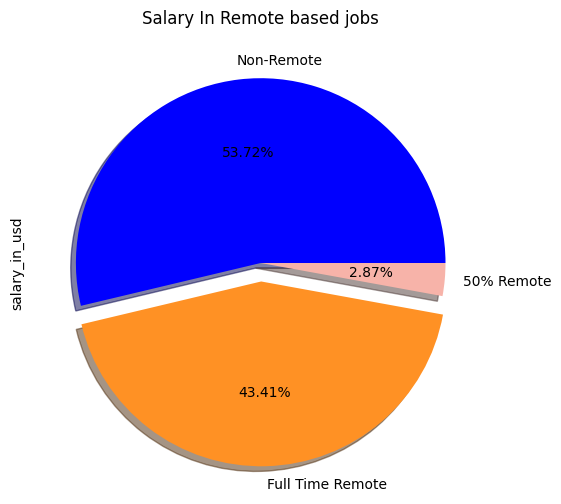

In [20]:
#find the sum of salary with remote ratio 
data.groupby('remote_ratio')['salary_in_usd'].sum().sort_values(ascending=False) \
.plot(kind='pie', figsize=(8, 6), title='Salary In Remote based jobs', explode=[0, 0.1, 0], \
      labels=['Non-Remote', 'Full Time Remote', '50% Remote'],
      colors=['blue', '#ff9124', '#f7b3a9'],
      autopct='%1.2f%%',
      shadow=True,
      radius=1,
      center=(10, 5))
plt.show()


In [21]:
#find the highest and lowest salary in the dataset
highest_salary=data.loc[data['salary_in_usd'].idxmax()]['job_title']
print("Highest Salary in the dataset:", highest_salary)
lowest_salary = data.loc[data["salary_in_usd"].idxmin()] ["job_title"]
print ("Lowest Salary in the Dataset: ", lowest_salary )

Highest Salary in the dataset: Research Scientist
Lowest Salary in the Dataset:  NLP Engineer


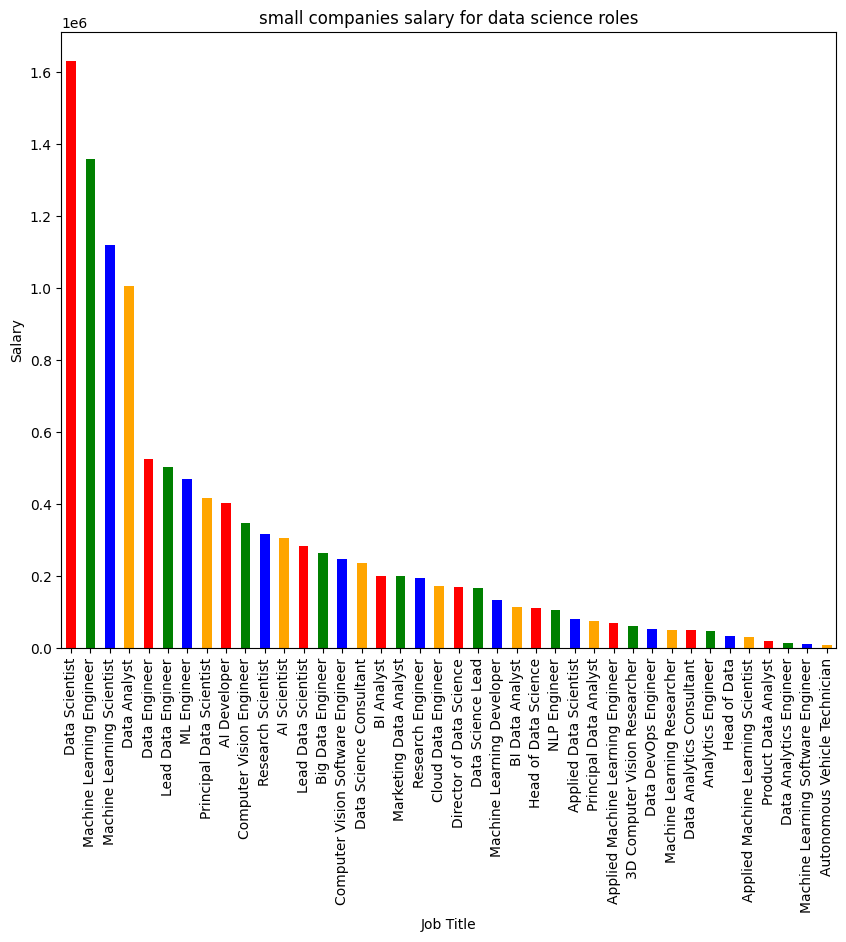

In [25]:
# visualize how small companies pay for different positions in data science
small=data['company_size']=='S'
data.loc[small].groupby(['job_title'])['salary_in_usd'].sum().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,8),title="small companies salary for data science roles", color=bar_colors)
plt.xlabel('Job Title')  # label the x axis with job title
plt.ylabel("Salary")
plt.show()

In [27]:
# Demanding roles in freelancing
employment = data['employment_type'] == 'FL'
grouped_data = data.loc[employment].groupby(['job_title'])['salary_in_usd'].sum().sort_values().reset_index()
grouped_data.style.background_gradient(cmap='cubehelix')


,job_title,salary_in_usd
0,Machine Learning Scientist,12000
1,Data Engineer,20000
2,Applied Machine Learning Scientist,30523
3,Autonomous Vehicle Technician,45555
4,Data Analytics Consultant,50000
5,Machine Learning Researcher,50000
6,Software Data Engineer,50000
7,Computer Vision Engineer,60000
8,Data Scientist,100000
9,Machine Learning Engineer,100000


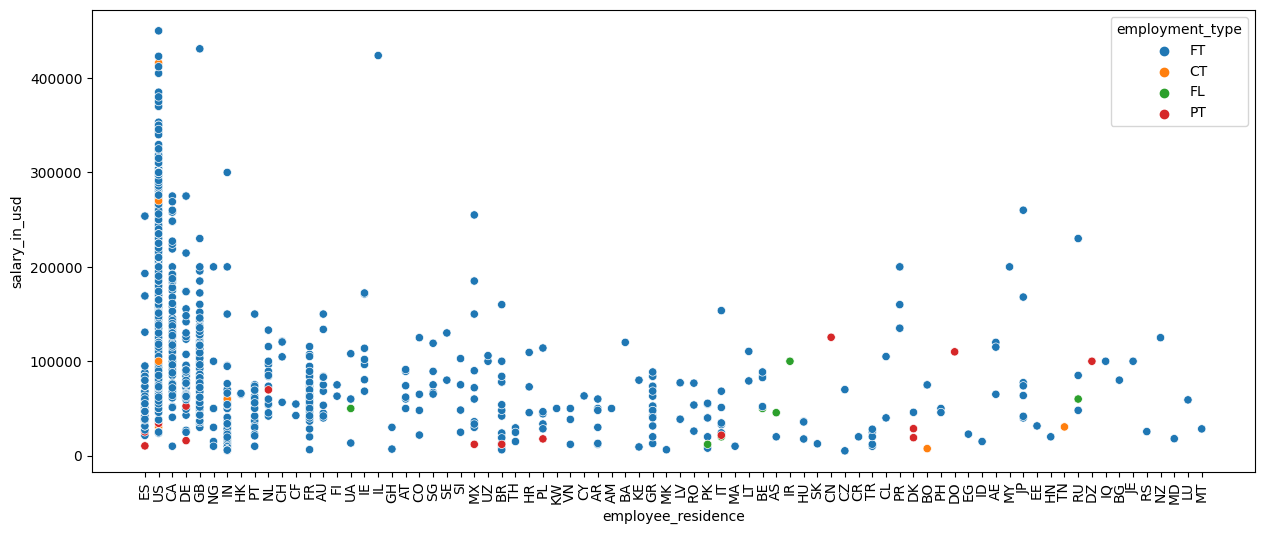

In [28]:
#correlation between employee residence and salary in usd
plt.figure(figsize=(15,6))
sns.scatterplot(data=data,x='employee_residence',y='salary_in_usd',hue='employment_type')
plt.xticks(rotation=90)
plt.show()


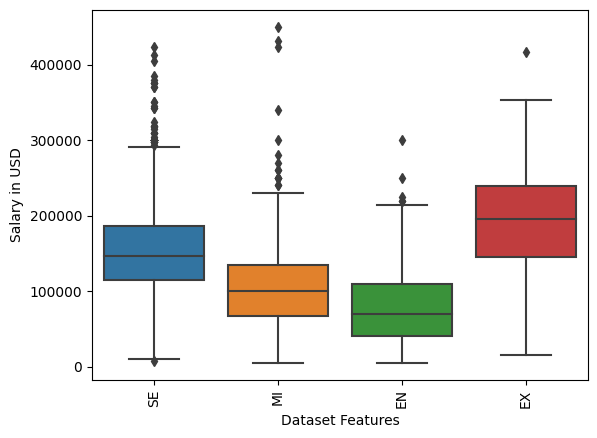

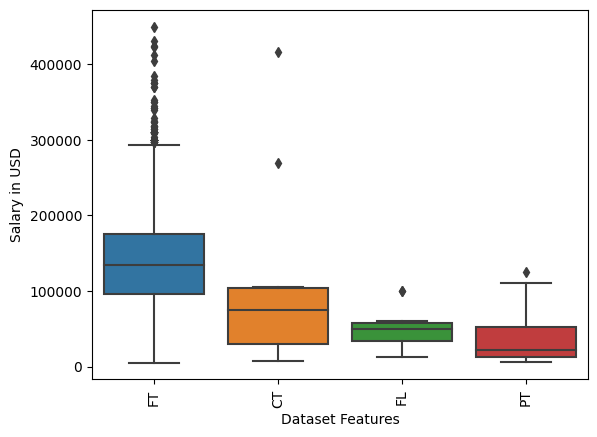

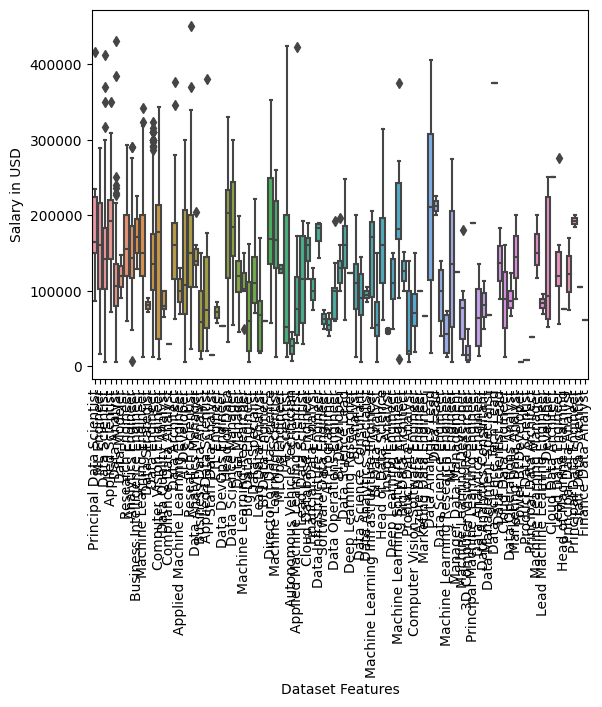

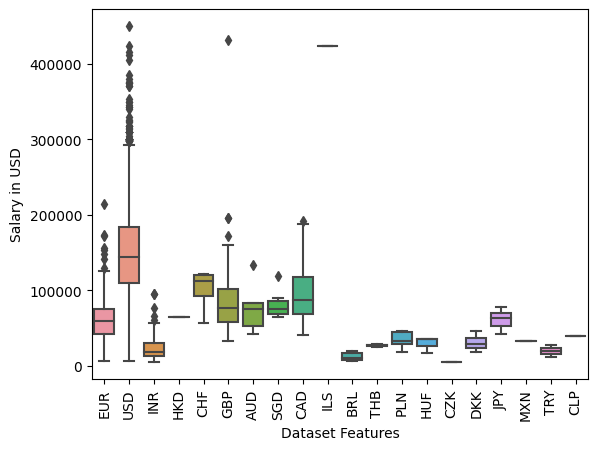

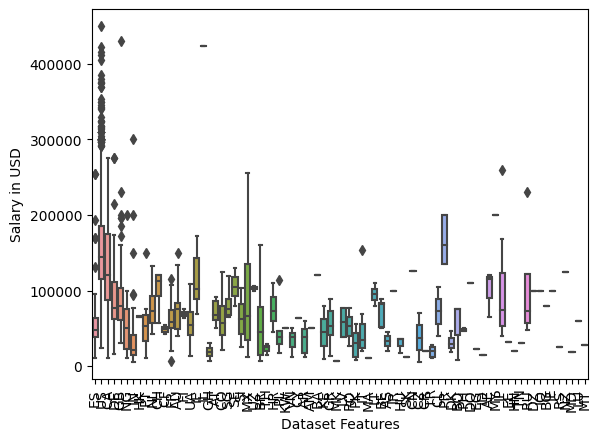

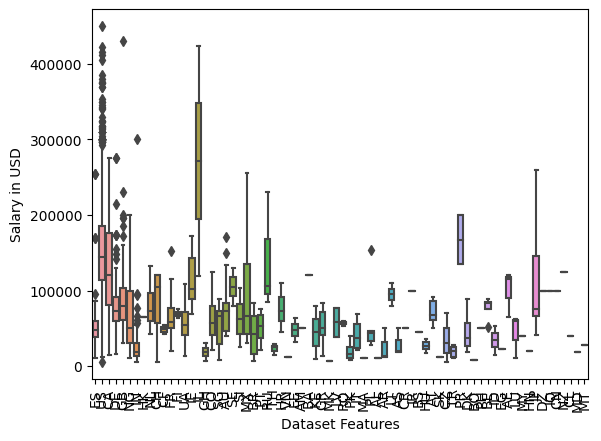

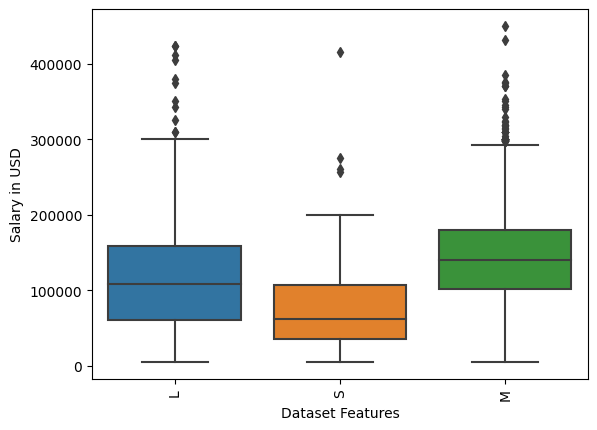

In [29]:
#boxplot to find outliers in the dataset
for i in data.select_dtypes(include='O'):
    sns.boxplot(data=data,x=data[i],y='salary_in_usd')
    plt.xlabel('Dataset Features')
    plt.ylabel('Salary in USD')
    plt.xticks(rotation=90)
    plt.show()

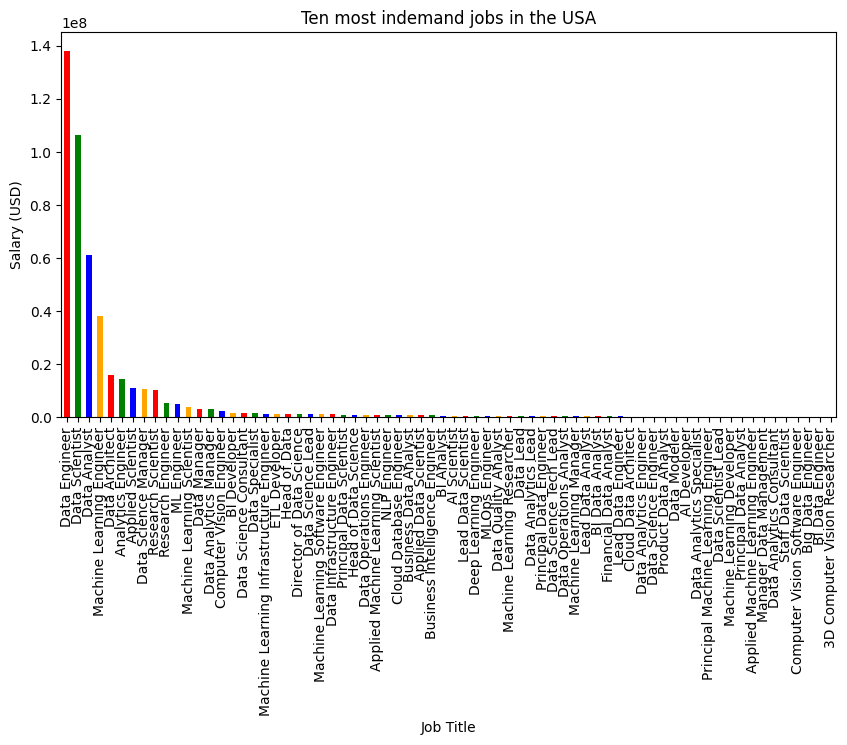

In [31]:
#preview the top ten demanding jobs in the USA
usa=data['employee_residence']=='US'
data.loc[usa].groupby(['job_title'])['salary_in_usd'].sum().sort_values(ascending=False)\
.plot(kind='bar',title='Ten most indemand jobs in the USA',figsize=(10,5),color=bar_colors)
plt.xlabel('Job Title')
plt.ylabel("Salary (USD)")
plt.show()

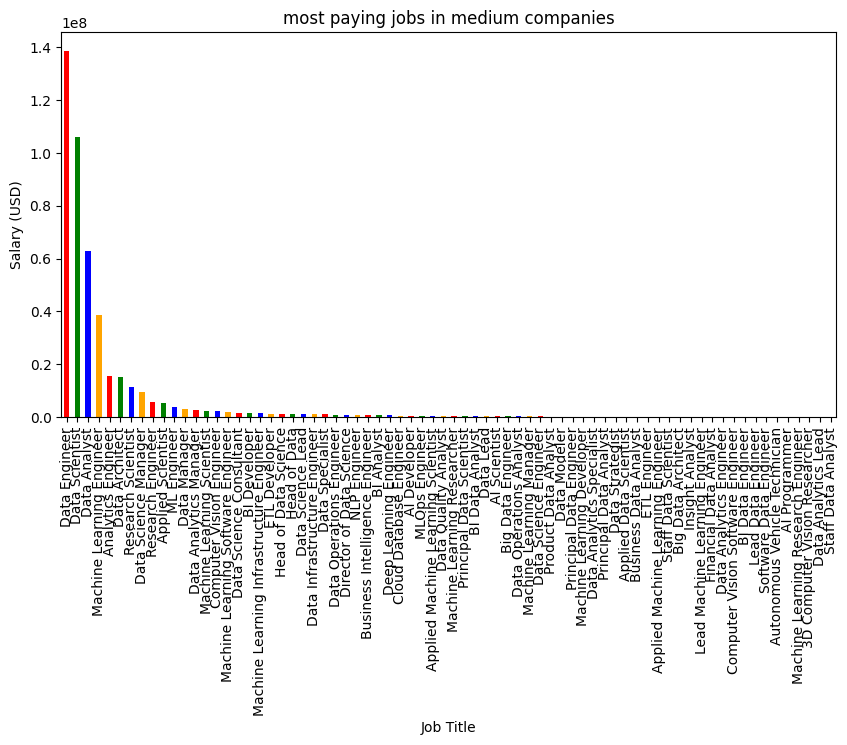

In [32]:
#most paying jobs in medium companies
medium=data['company_size']=='M'
data.loc[medium].groupby(['job_title'])['salary_in_usd'].sum().sort_values(ascending=False)\
.plot(kind='bar',title='most paying jobs in medium companies',figsize=(10,5),color=bar_colors)
plt.xlabel('Job Title')
plt.ylabel("Salary (USD)")
plt.show()

### Modelling

In [33]:
#import the relevant libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from keras.models import Sequential  #for creating a neural network model
from keras.layers import Dense  	#for adding layers to our neural netowrk
from keras.optimizers import Adam    #to use an optimization algorithm called adam
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [34]:
#convert catergorical columns into numerical using label encoder
for col in data.select_dtypes(include='object').columns:
    label_encoder=LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])
    print(f'{col} : {data[col].unique()}')

experience_level : [3 2 0 1]
employment_type : [2 0 1 3]
job_title : [84 66 47  8 25 38 88  4 18 69 50 33 23 41 22 31  6  1 89 29 17  5 91 55
 32 58 45 37 73 16 49 62 13 53 74 67  3  9  7 64 21 57 34 90  2 40 14 44
 52 11 42 30 70 12 59 61 51 75 15 86 24 10 78 28 35 43 72 79 76 68  0 85
 27 26 36 46 48 20 39 77 80 87 82 71 65 54 19 63 60 81 83 92 56]
salary_currency : [ 7 19 12  9  3  8  0 16  2 11  1 17 15 10  5  6 13 14 18  4]
employee_residence : [26 75 11 20 29 56 39 32 63 57 13 12 28  5 27 74 37 38 30  4 16 68 67 69
 54 76 10 71 34 61 46 77 18  2  1  6 45 31 52 49 64 60 42 50 47  7  3 41
 35 70 15 19 17 73 14 62 21  9 59 22 25 36  0 55 44 24 33 72 66 23 40  8
 43 65 58 51 48 53]
company_location : [25 70 12 20 28 53 38 31 54 14 13 27 26 69 36 37 29 17 64  6 63 65 51 10
 60 62 67 33 71 23  2  7 43 30 49 46 61 57 41 47 58  1  3 44  4 18 40 11
 34  5 66 19 68 59 21  9 56  8 35 24  0 45 52 32 42 22 39 16 55 15 48 50]
company_size : [0 2 1]


In [35]:
#assigning x and y variables
X=data.drop(['salary','salary_in_usd'],axis=1)
y=data['salary_in_usd']
#normalize the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
#splitting into train test split 80:20 ratio
x_train,x_test,y_train,y_test = train_test_split(X_scaled , y,test_size=0.3, random_state=42)

In [37]:
#function to build machine learning model
def model_building(model,x_train,x_test,y_train,y_test):
    model.fit(x_train, y_train) #training the data on our training set
    y_pred=model.predict(x_test)
    absolute_error=mean_absolute_error(y_test,y_pred)
    squared_error=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    score=r2_score(y_test,y_pred)
    N=len(y_test)
    k=4
    score2=(1-score)*(N-1)/(N-k-1)
    print('Mean_abslte_error {:.4f}'.format(absolute_error))
    print('Mean_sqrd_error {:.4f}'.format(squared_error))
    print('rms {:.4f}'.format(rmse))
    print('r2 {:.2f}'.format(score2))
#build baseline model
linear=LinearRegression(fit_intercept=True)
model_building(linear, x_train,x_test,y_train,y_test)

Mean_abslte_error 40923.9558
Mean_sqrd_error 2914651398.2982
rms 53987.5115
r2 0.74
